In [23]:
import scanpy as sc
import pandas as pd
import pandas as pd
from matplotlib import rcParams
from matplotlib import style
import matplotlib.pyplot as plt
import scirpy as ir
import anndata

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = 16,14
pd.set_option('display.max_columns', None) 


In [3]:
tp1 = sc.read_h5ad('/home/matthew/Research/HL_PD1/bcell_subsets/b11.h5ad')
tp2 = sc.read_h5ad('/home/matthew/Research/HL_PD1/bcell_subsets/b22.h5ad')
tp3 = sc.read_h5ad('/home/matthew/Research/HL_PD1/bcell_subsets/b3.h5ad')
tp4 = sc.read_h5ad('/home/matthew/Research/HL_PD1/bcell_subsets/b4.h5ad')
tp5 = sc.read_h5ad('/home/matthew/Research/HL_PD1/bcell_subsets/b5.h5ad')
tp6 = sc.read_h5ad('/home/matthew/Research/HL_PD1/bcell_subsets/b6.h5ad')

print(tp1)
print(tp2)
print(tp3)
print(tp4)
print(tp5)
print(tp6)

AnnData object with n_obs × n_vars = 18 × 16420
    obs: 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'percent_mito', 'percent_ribo', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT'
    var: 'name'
    obsm: 'X_pca', 'X_umap'
AnnData object with n_obs × n_vars = 107 × 16420
    obs: 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'percent_mito', 'percent_ribo', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT'
    var: 'name'
    obsm: 'X_pca', 'X_umap'
AnnData object with n_obs × n_vars = 221 × 16420
    obs: 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'percent_mito', 'percent_ribo', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT'
    var: 'name'
    obsm: 'X_pca', 'X_umap'
AnnData object with n_obs × n_vars = 100 × 16420
    obs: 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'percent_mito', 'percent_ribo', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT'
    v

In [4]:
tp1.obs['Timepoint'] = '1'
tp2.obs['Timepoint'] = '2'
tp3.obs['Timepoint'] = '3'
tp4.obs['Timepoint'] = '4'
tp5.obs['Timepoint'] = '5'
tp6.obs['Timepoint'] = '6'

tp1.obs['Disease_status'] = 'HL'
tp2.obs['Disease_status'] = 'Remission'
tp3.obs['Disease_status'] = 'Remission'
tp4.obs['Disease_status'] = 'Relapse'
tp5.obs['Disease_status'] = 'Relapse'
tp6.obs['Disease_status'] = 'Relapse'

tp1.obs['Pembrolizumab'] = 'No'
tp2.obs['Pembrolizumab'] = 'Yes'
tp3.obs['Pembrolizumab'] = 'Yes'
tp4.obs['Pembrolizumab'] = 'No'
tp5.obs['Pembrolizumab'] = 'Yes'
tp6.obs['Pembrolizumab'] = 'No'

tp1.obs['iRAE'] = 'No'
tp2.obs['iRAE'] = 'Yes'
tp3.obs['iRAE'] = 'No'
tp4.obs['iRAE'] = 'No'
tp5.obs['iRAE'] = 'Yes'
tp6.obs['iRAE'] = 'No'



In [5]:
tp1_bcr = ir.io.read_10x_vdj(
    "/home/matthew/Research/tcr_data_scanpy/timepoint1-bcell.csv"
)

tp2_bcr = ir.io.read_10x_vdj(
    "/home/matthew/Research/tcr_data_scanpy/timepoint2-bcell.csv"
)

tp3_bcr = ir.io.read_10x_vdj(
    "/home/matthew/Research/tcr_data_scanpy/timepoint3-bcell.csv"
)

tp4_bcr = ir.io.read_10x_vdj(
    "/home/matthew/Research/tcr_data_scanpy/timepoint4-bcell.csv"
)

tp5_bcr = ir.io.read_10x_vdj(
    "/home/matthew/Research/tcr_data_scanpy/timepoint5-bcell.csv"
)

tp6_bcr = ir.io.read_10x_vdj(
    "/home/matthew/Research/tcr_data_scanpy/timepoint6-bcell.csv"
)

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_2_expr' as categorical
... storing 'IR_VDJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_junction_ins' as categorical
... storing 'IR_VJ_2_junction_ins' as categorical
... storing 'IR_VDJ_1_junction_ins' as categorical
... storing 'IR_VDJ_2_junction_ins' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing

In [6]:
#function to fix tcr dataframe so we can merge
def fixTcrDF(obj,timepoint,suffix):
    obj.obs['cell_id'] = obj.obs.index
    obj.obs
    obj.obs['cell_id'] = obj.obs['cell_id'].str.replace(suffix, '')
    obj.obs['cell_id'] = timepoint + obj.obs['cell_id'].astype(str)
    obj.obs.index = obj.obs['cell_id']
    obj.obs
    return obj




In [8]:
tp1_bcr = fixTcrDF(tp1_bcr,"Timepoint_1_",'_1')
tp2_bcr = fixTcrDF(tp2_bcr,"Timepoint_2_",'_2')
tp3_bcr = fixTcrDF(tp3_bcr,"Timepoint_3_",'_3')
tp4_bcr = fixTcrDF(tp4_bcr,"Timepoint_4_",'_4')
tp5_bcr = fixTcrDF(tp5_bcr,"Timepoint_5_",'_5')
tp6_bcr = fixTcrDF(tp6_bcr,"Timepoint_6_",'_6')

In [10]:
tp1.obs

,nCount_RNA,nFeature_RNA,log10GenesPerUMI,percent_mito,percent_ribo,percent_hb,S.Score,G2M.Score,Phase,nCount_SCT,nFeature_SCT,Timepoint,Disease_status,Pembrolizumab,iRAE
Timepoint_1_AAGTCTGCATCTGGTA-1,4292.0,1232,0.850858,7.430701,40.810622,0.000000,-0.047331,-0.007610,G1,4409.0,1228,1,HL,No,No
Timepoint_1_AAGTCTGTCCTAAGTG-1,10723.0,2578,0.846472,7.328671,22.442890,0.000000,0.047257,0.038171,S,5313.0,2065,1,HL,No,No
Timepoint_1_ACAGCCGTCTCTGTCG-1,3193.0,998,0.855868,4.948324,41.089884,0.000000,0.025017,-0.057262,S,4183.0,1008,1,HL,No,No
Timepoint_1_AGTCTTTTCAAACCAC-1,4637.0,1555,0.870628,4.959034,29.624838,0.000000,0.004775,-0.038388,S,4631.0,1551,1,HL,No,No
Timepoint_1_CAGCTAATCGCCATAA-1,4155.0,1230,0.852824,6.447775,38.496312,0.000000,0.015312,-0.002075,S,4341.0,1225,1,HL,No,No
Timepoint_1_CATGCCTGTAAAGGAG-1,4896.0,1385,0.851378,7.066993,39.583333,0.000000,-0.056421,0.003474,G2M,4697.0,1378,1,HL,No,No
Timepoint_1_CCACCTAAGGTGACCA-1,2738.0,1068,0.881056,8.290723,32.907232,0.000000,-0.016673,-0.020452,G1,4065.0,1092,1,HL,No,No
Timepoint_1_CCACGGAGTCGGCATC-1,2754.0,895,0.858097,6.826434,42.665214,0.000000,0.037033,0.016757,S,4161.0,918,1,HL,No,No
Timepoint_1_CCACGGATCCCTAATT-1,6589.0,1887,0.857828,6.857836,33.682294,0.015172,0.007215,-0.017358,S,5057.0,1863,1,HL,No,No
Timepoint_1_CGGGTCACAAGCTGAG-1,3028.0,1068,0.870071,6.866953,33.839551,0.000000,0.028163,-0.043307,S,4088.0,1077,1,HL,No,No


In [11]:
tp1_bcr.obs

,multi_chain,IR_VJ_1_locus,IR_VJ_2_locus,IR_VDJ_1_locus,IR_VDJ_2_locus,IR_VJ_1_cdr3,IR_VJ_2_cdr3,IR_VDJ_1_cdr3,IR_VDJ_2_cdr3,IR_VJ_1_cdr3_nt,IR_VJ_2_cdr3_nt,IR_VDJ_1_cdr3_nt,IR_VDJ_2_cdr3_nt,IR_VJ_1_expr,IR_VJ_2_expr,IR_VDJ_1_expr,IR_VDJ_2_expr,IR_VJ_1_expr_raw,IR_VJ_2_expr_raw,IR_VDJ_1_expr_raw,IR_VDJ_2_expr_raw,IR_VJ_1_v_gene,IR_VJ_2_v_gene,IR_VDJ_1_v_gene,IR_VDJ_2_v_gene,IR_VJ_1_d_gene,IR_VJ_2_d_gene,IR_VDJ_1_d_gene,IR_VDJ_2_d_gene,IR_VJ_1_j_gene,IR_VJ_2_j_gene,IR_VDJ_1_j_gene,IR_VDJ_2_j_gene,IR_VJ_1_c_gene,IR_VJ_2_c_gene,IR_VDJ_1_c_gene,IR_VDJ_2_c_gene,IR_VJ_1_junction_ins,IR_VJ_2_junction_ins,IR_VDJ_1_junction_ins,IR_VDJ_2_junction_ins,has_ir,cell_id
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Timepoint_1_AACACGTCACGACTCG-1,False,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,False,Timepoint_1_AACACGTCACGACTCG-1
Timepoint_1_AACACGTGTCGAACAG-1,False,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,False,Timepoint_1_AACACGTGTCGAACAG-1
Timepoint_1_AACCGCGGTAGGACAC-1,False,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,False,Timepoint_1_AACCGCGGTAGGACAC-1
Timepoint_1_AAGTCTGCATCTGGTA-1,False,IGL,NaN,IGH,NaN,CQAWDSSTSVVF,None,CARAPYYYDSSGYYPGPSDAFDIW,None,TGTCAGGCGTGGGACAGCAGCACTTCTGTGGTATTC,None,TGTGCGAGAGCCCCGTATTACTATGATAGTAGTGGTTATTACCCCG...,None,80.0,NaN,15.0,None,3909.0,NaN,667.0,None,IGLV3-1,NaN,IGHV3-7,NaN,None,NaN,IGHD3-22,NaN,IGLJ2,NaN,IGHJ3,NaN,IGLC2,NaN,IGHM,NaN,None,None,None,None,True,Timepoint_1_AAGTCTGCATCTGGTA-1
Timepoint_1_AAGTCTGTCCTAAGTG-1,False,IGL,NaN,IGH,NaN,CSSFTSSSIFVLF,None,CAKGTKAHFYGSGAFGIYFDYW,None,TGCAGCTCATTTACAAGCAGTAGTATTTTCGTGTTATTC,None,TGTGCGAAGGGGACCAAAGCCCATTTCTATGGTTCGGGGGCTTTTG...,None,334.0,NaN,36.0,None,12556.0,NaN,1087.0,None,IGLV2-14,NaN,IGHV3-23,NaN,None,NaN,IGHD3-10,NaN,IGLJ2,NaN,IGHJ4,NaN,IGLC2,NaN,IGHA1,NaN,None,None,None,None,True,Timepoint_1_AAGTCTGTCCTAAGTG-1
Timepoint_1_ACACCAATCCACGTTC-1,False,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,False,Timepoint_1_ACACCAATCCACGTTC-1
Timepoint_1_ACAGCCGTCTCTGTCG-1,False,IGL,NaN,IGH,NaN,CQSYDSSLSGSVF,None,CARLGPLTMVQGVIAYFDYW,None,TGCCAGTCCTATGACAGCAGCCTGAGTGGTTCGGTGTTC,None,TGTGCGAGACTTGGACCCCTTACTATGGTTCAGGGAGTTATCGCCT...,None,57.0,NaN,26.0,None,2629.0,NaN,935.0,None,IGLV1-40,NaN,IGHV4-39,NaN,None,NaN,IGHD3-10,NaN,IGLJ3,NaN,IGHJ4,NaN,IGLC3,NaN,IGHM,NaN,None,None,None,None,True,Timepoint_1_ACAGCCGTCTCTGTCG-1
Timepoint_1_ACGCCGAAGTGTCCAT-1,False,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,False,Timepoint_1_ACGCCGAAGTGTCCAT-1
Timepoint_1_ACTTGTTGTTCGTCTC-1,False,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,False,Timepoint_1_ACTTGTTGTTCGTCTC-1


In [12]:
ir.pp.merge_with_ir(tp1, tp1_bcr)
ir.pp.merge_with_ir(tp2, tp2_bcr)
ir.pp.merge_with_ir(tp3, tp3_bcr)
ir.pp.merge_with_ir(tp4, tp4_bcr)
ir.pp.merge_with_ir(tp5, tp5_bcr)
ir.pp.merge_with_ir(tp6, tp6_bcr)

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'Timepoint' as categorical
... storing 'Disease_status' as categorical
... storing 'Pembrolizumab' as categorical
... storing 'iRAE' as categorical
... storing 'multi_chain' as categorical
... storing 'Timepoint' as categorical
... storing 'Disease_status' as categorical
... storing 'Pembrolizumab' as categorical
... storing 'iRAE' as categorical
... storing 'Timepoint' as categorical
... storing 'Disease_status' as categorical
... storing 'Pembrolizumab' as categorical
... storing 'iRAE' as categorical
... storing 'cell_id' as categorical
... storing 'multi_chain' as categorical
... storing 'Timepoint' as categorical
... storing 'Disease_status' as categorical
... storing 'Pembrolizumab' as categorical
... storing 'i

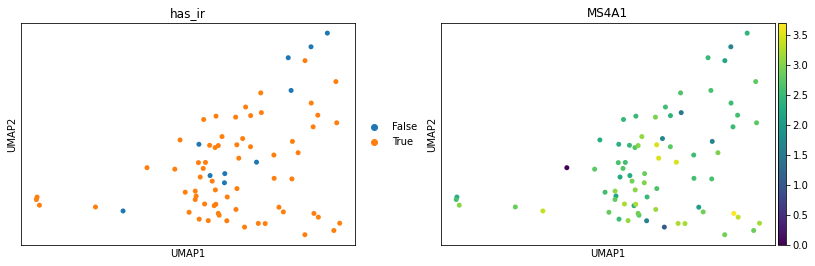

In [18]:
sc.pl.umap(tp6, color=["has_ir", "MS4A1"],size=100)

In [19]:
adatas = []
adatas.append(tp1)
adatas.append(tp2)
adatas.append(tp3)
adatas.append(tp4)
adatas.append(tp5)
adatas.append(tp6)

adata = adatas[0].concatenate(adatas[1:],index_unique=None)

In [40]:
adata.obs['new.ident']="B Cell"
adata.obs

,nCount_RNA,nFeature_RNA,log10GenesPerUMI,percent_mito,percent_ribo,percent_hb,S.Score,G2M.Score,Phase,nCount_SCT,nFeature_SCT,Timepoint,Disease_status,Pembrolizumab,iRAE,cell_id,IR_VJ_1_locus,IR_VJ_2_locus,IR_VDJ_1_locus,IR_VDJ_2_locus,IR_VJ_1_cdr3,IR_VJ_2_cdr3,IR_VDJ_1_cdr3,IR_VDJ_2_cdr3,IR_VJ_1_cdr3_nt,IR_VJ_2_cdr3_nt,IR_VDJ_1_cdr3_nt,IR_VDJ_2_cdr3_nt,IR_VJ_1_expr,IR_VJ_2_expr,IR_VDJ_1_expr,IR_VDJ_2_expr,IR_VJ_1_expr_raw,IR_VJ_2_expr_raw,IR_VDJ_1_expr_raw,IR_VDJ_2_expr_raw,IR_VJ_1_v_gene,IR_VJ_2_v_gene,IR_VDJ_1_v_gene,IR_VDJ_2_v_gene,IR_VJ_1_d_gene,IR_VJ_2_d_gene,IR_VDJ_1_d_gene,IR_VDJ_2_d_gene,IR_VJ_1_j_gene,IR_VJ_2_j_gene,IR_VDJ_1_j_gene,IR_VDJ_2_j_gene,IR_VJ_1_c_gene,IR_VJ_2_c_gene,IR_VDJ_1_c_gene,IR_VDJ_2_c_gene,IR_VJ_1_junction_ins,IR_VJ_2_junction_ins,IR_VDJ_1_junction_ins,IR_VDJ_2_junction_ins,has_ir,multi_chain,batch,receptor_type,receptor_subtype,chain_pairing,clonotype,clonotype_size,ct_cluster_aa_alignment,ct_cluster_aa_alignment_size,ct_cluster_aa_alignment_same_v,ct_cluster_aa_alignment_same_v_size,clonal_expansion,new.ident
Timepoint_1_AAGTCTGCATCTGGTA-1,4292.0,1232,0.850858,7.430701,40.810622,0.0,-0.047331,-0.007610,G1,4409.0,1228,1,HL,No,No,Timepoint_1_AAGTCTGCATCTGGTA-1,IGL,nan,IGH,NaN,CQAWDSSTSVVF,None,CARAPYYYDSSGYYPGPSDAFDIW,None,TGTCAGGCGTGGGACAGCAGCACTTCTGTGGTATTC,None,TGTGCGAGAGCCCCGTATTACTATGATAGTAGTGGTTATTACCCCG...,None,80.0,NaN,15.0,None,3909.0,NaN,667.0,None,IGLV3-1,nan,IGHV3-7,NaN,None,NaN,IGHD3-22,NaN,IGLJ2,nan,IGHJ3,NaN,IGLC2,nan,IGHM,NaN,None,None,None,None,True,False,0,BCR,IGH+IGL,single pair,0_BCR,1,0,1,0_IGLV3-1_IGHV3-7_BCR,1,1,B Cell
Timepoint_1_AAGTCTGTCCTAAGTG-1,10723.0,2578,0.846472,7.328671,22.442890,0.0,0.047257,0.038171,S,5313.0,2065,1,HL,No,No,Timepoint_1_AAGTCTGTCCTAAGTG-1,IGL,nan,IGH,NaN,CSSFTSSSIFVLF,None,CAKGTKAHFYGSGAFGIYFDYW,None,TGCAGCTCATTTACAAGCAGTAGTATTTTCGTGTTATTC,None,TGTGCGAAGGGGACCAAAGCCCATTTCTATGGTTCGGGGGCTTTTG...,None,334.0,NaN,36.0,None,12556.0,NaN,1087.0,None,IGLV2-14,nan,IGHV3-23,NaN,None,NaN,IGHD3-10,NaN,IGLJ2,nan,IGHJ4,NaN,IGLC2,nan,IGHA1,NaN,None,None,None,None,True,False,0,BCR,IGH+IGL,single pair,1_BCR,1,1,1,1_IGLV2-14_IGHV3-23_BCR,1,1,B Cell
Timepoint_1_ACAGCCGTCTCTGTCG-1,3193.0,998,0.855868,4.948324,41.089884,0.0,0.025017,-0.057262,S,4183.0,1008,1,HL,No,No,Timepoint_1_ACAGCCGTCTCTGTCG-1,IGL,nan,IGH,NaN,CQSYDSSLSGSVF,None,CARLGPLTMVQGVIAYFDYW,None,TGCCAGTCCTATGACAGCAGCCTGAGTGGTTCGGTGTTC,None,TGTGCGAGACTTGGACCCCTTACTATGGTTCAGGGAGTTATCGCCT...,None,57.0,NaN,26.0,None,2629.0,NaN,935.0,None,IGLV1-40,nan,IGHV4-39,NaN,None,NaN,IGHD3-10,NaN,IGLJ3,nan,IGHJ4,NaN,IGLC3,nan,IGHM,NaN,None,None,None,None,True,False,0,BCR,IGH+IGL,single pair,2_BCR,1,2,1,2_IGLV1-40_IGHV4-39_BCR,1,1,B Cell
Timepoint_1_AGTCTTTTCAAACCAC-1,4637.0,1555,0.870628,4.959034,29.624838,0.0,0.004775,-0.038388,S,4631.0,1551,1,HL,No,No,Timepoint_1_AGTCTTTTCAAACCAC-1,IGL,nan,IGH,NaN,CAAWDDSLNGWVF,None,CARDVDYGGKSGLGYW,None,TGTGCAGCATGGGATGACAGCCTGAATGGTTGGGTGTTC,None,TGTGCGAGAGATGTTGACTACGGTGGTAAATCCGGTCTAGGCTACTGG,None,54.0,NaN,40.0,None,2547.0,NaN,1388.0,None,IGLV1-44,nan,IGHV7-81,NaN,None,NaN,IGHD4-23,NaN,IGLJ3,nan,IGHJ4,NaN,IGLC2,nan,IGHM,NaN,None,None,None,None,True,False,0,BCR,IGH+IGL,single pair,3_BCR,1,3,1,3_IGLV1-44_IGHV7-81_BCR,1,1,B Cell
Timepoint_1_CAGCTAATCGCCATAA-1,4155.0,1230,0.852824,6.447775,38.496312,0.0,0.015312,-0.002075,S,4341.0,1225,1,HL,No,No,Timepoint_1_CAGCTAATCGCCATAA-1,IGL,IGL,IGH,NaN,CQTWGPNWVF,CGTWHSNSKTHPLF,CAREMATNSLRGGFIYVDCW,None,TGTCAGACCTGGGGCCCTAATTGGGTGTTC,TGTGGTACATGGCACAGCAACTCTAAGACTCATCCTCTATTC,TGTGCGAGGGAGATGGCTACAAATTCCTTGAGGGGGGGATTTATAT...,None,85.0,54.0,20.0,None,4329.0,2232.0,520.0,None,IGLV4-69,IGLV5-52,IGHV3-23,NaN,None,None,IGHD5-24,NaN,IGLJ3,IGLJ2,IGHJ4,NaN,IGLC2,IGLC2,IGHA1,NaN,None,None,None,None,True,False,0,BCR,IGH+IGL,extra VJ,4_BCR,1,4,1,4_IGLV4-69_IGHV3-23_BCR,1,1,B Cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'Timepoint' as categorical
... storing 'Disease_status' as categorical
... storing 'Pembrolizumab' as categorical
... storing 'iRAE' as categorical
... storing 'cell_id' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_1_v_gene' as categorical
... storing 'IR_VJ_2_v_gene' as categorical
... storing 'IR_VDJ_1_v_gene' as categorical
... storing 'IR_VDJ_1_d_gene' as categorical
... storing 'IR_VJ_1_j_gene' as categorical
... storing 'I

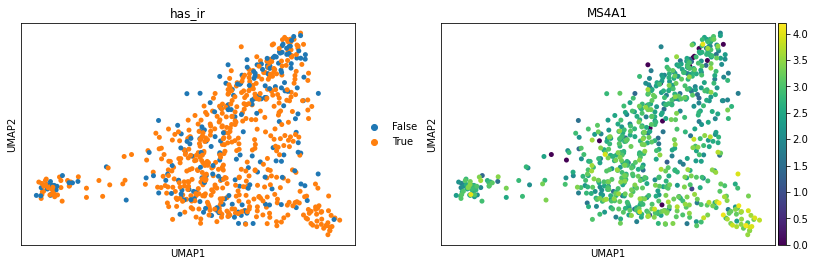

In [21]:
sc.pl.umap(adata, color=["has_ir", "MS4A1"],size=100)

... storing 'receptor_type' as categorical
... storing 'receptor_subtype' as categorical
... storing 'chain_pairing' as categorical


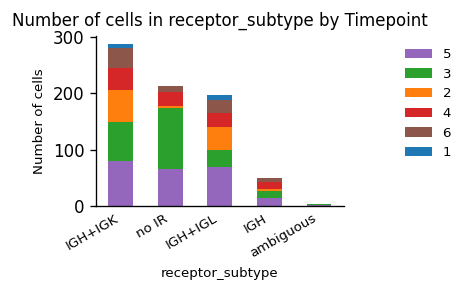

In [24]:
#qc

ir.tl.chain_qc(adata)
ir.pl.group_abundance(adata, groupby="receptor_subtype", target_col="Timepoint")

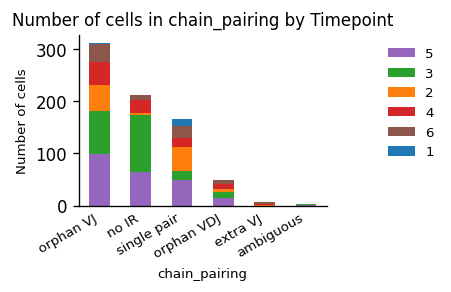

In [25]:
ir.pl.group_abundance(adata, groupby="chain_pairing", target_col="Timepoint")

In [26]:
#receptor_arms="any"
#receptor_arms="all"
ir.pp.ir_neighbors(adata, receptor_arms="all", dual_ir="primary_only")

100%|██████████| 855/855 [00:00<00:00, 166967.59it/s]


In [27]:
ir.tl.define_clonotypes(adata)

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'clonotype' as categorical


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efc50fcb710>],
      dtype=object)

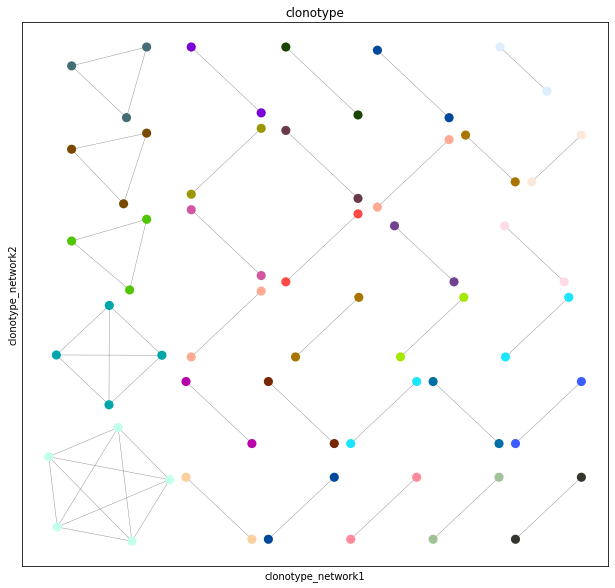

In [28]:
ir.tl.clonotype_network(adata, min_size=2)
ir.pl.clonotype_network(adata, color="clonotype", legend_loc="none")

In [29]:
sc.settings.verbosity = 4
ir.pp.ir_neighbors(
    adata,
    metric="alignment",
    sequence="aa",
    cutoff=15,
    receptor_arms="all",
    dual_ir="all",
)
ir.tl.define_clonotype_clusters(
    adata, partitions="connected", sequence="aa", metric="alignment", within_group=None
)

ir.tl.clonotype_network(adata, min_size=4, sequence="aa", metric="alignment")

Initializing IrNeighbors object...
Finished initalizing IrNeighbors object.  (0:00:00)
Computing VJ pairwise distances...
100%|██████████| 28/28 [00:00<00:00, 146.72it/s]
Finished computing VJ pairwise distances. (0:00:00)
Computing VDJ pairwise distances...
100%|██████████| 15/15 [00:00<00:00, 176.69it/s]
Finished computing VDJ pairwise distances. (0:00:00)
Started comstructing VJ coord-dictionary...
100%|██████████| 1612/1612 [00:00<00:00, 65914.23it/s]
Finished constructing VJ coord-dictionary (0:00:00)
Started comstructing VDJ coord-dictionary...
100%|██████████| 223/223 [00:00<00:00, 85309.17it/s]
Finished constructing VDJ coord-dictionary (0:00:00)
Constructing cell x cell distance matrix...
100%|██████████| 8971/8971 [00:00<00:00, 231082.12it/s]
Finished constructing cell x cell distance matrix.  (0:00:00)
    Started converting distances to connectivities. 
    Finished converting distances to connectivities.  (0:00:00)


/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'ct_cluster_aa_alignment' as categorical


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efc98bc1ba8>],
      dtype=object)

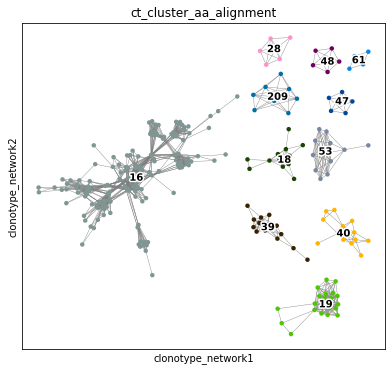

In [30]:
ir.pl.clonotype_network(
    adata,
    color="ct_cluster_aa_alignment",
    legend_fontoutline=3,
    size=80,
    panel_size=(6, 6),
    legend_loc="on data",
)


/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efc98bd7898>],
      dtype=object)

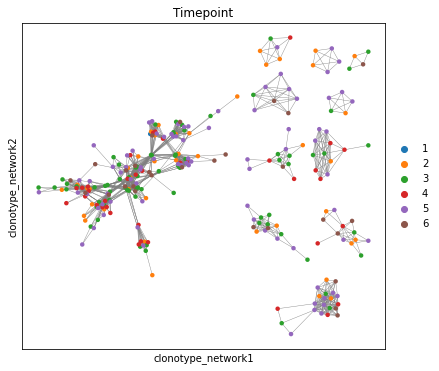

In [31]:
ir.pl.clonotype_network(adata, color="Timepoint", size=80, panel_size=(6, 6))


In [32]:
ir.tl.define_clonotype_clusters(
    adata,
    sequence="aa",
    metric="alignment",
    same_v_gene="primary_only",
    key_added="ct_cluster_aa_alignment_same_v",
)


In [33]:
ct_different_v = adata.obs.groupby("ct_cluster_aa_alignment").apply(
    lambda x: x["ct_cluster_aa_alignment_same_v"].unique().size > 1
)
ct_different_v = ct_different_v[ct_different_v].index.values
ct_different_v

['16', '18', '19', '40', '53']
Categories (495, object): ['0', '1', '2', '3', ..., '491', '492', '493', '494']

In [34]:
ir.tl.clonal_expansion(adata)

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


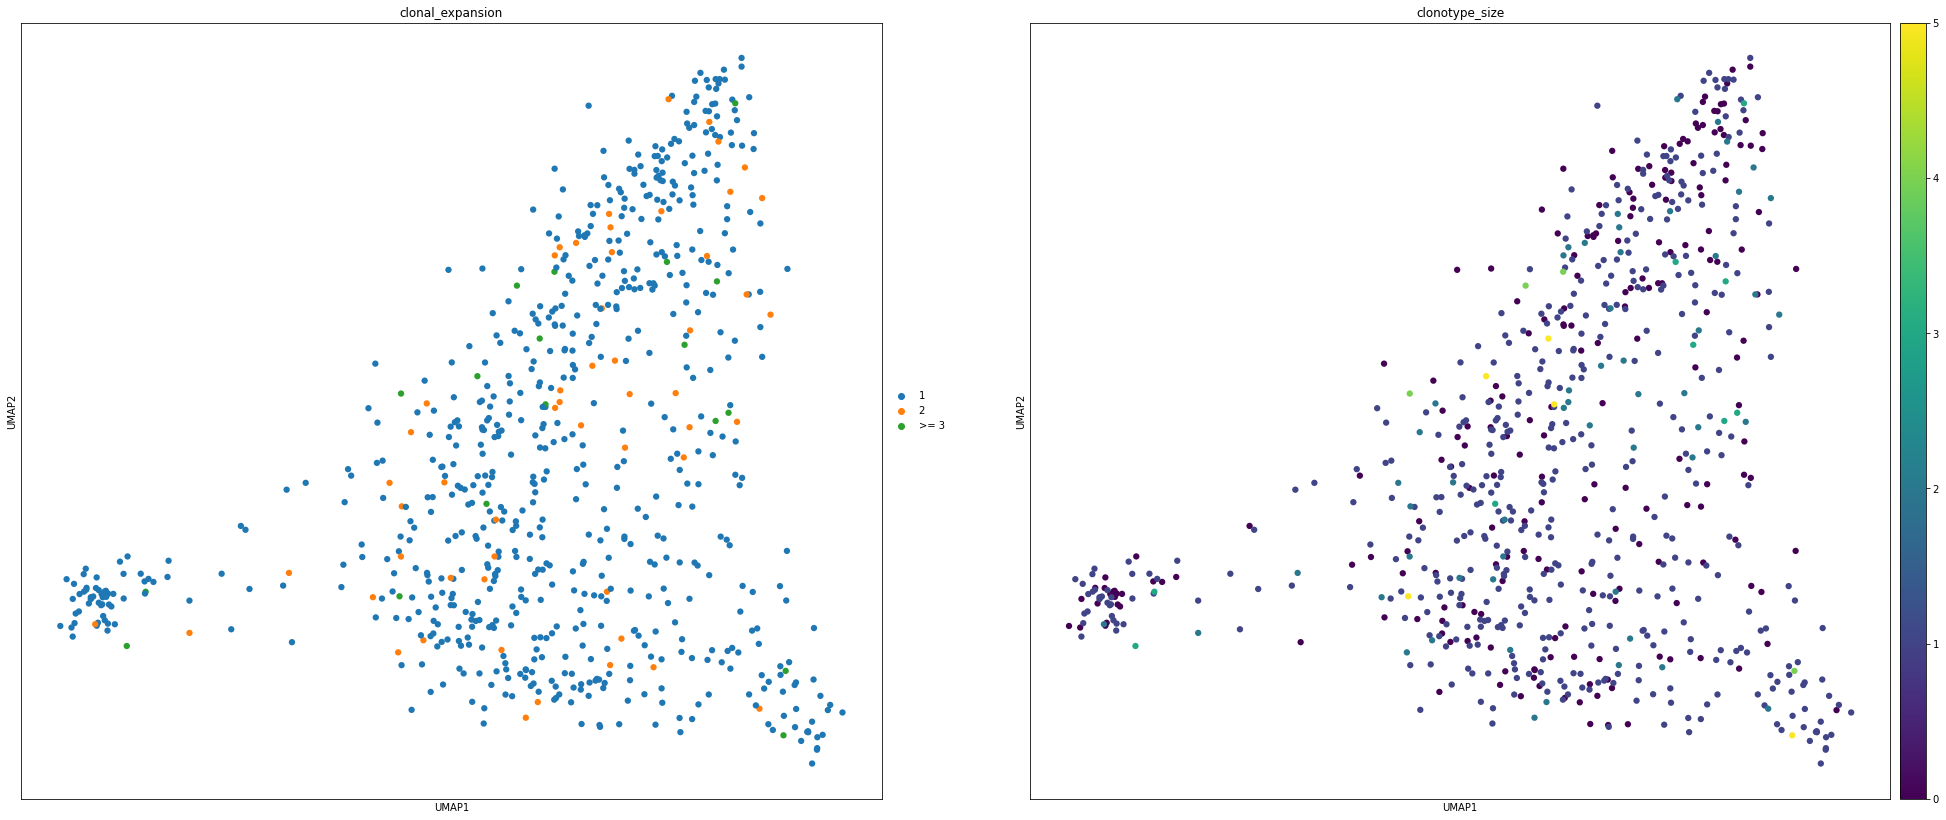

In [87]:
adata.obs.loc[adata.obs["has_ir"] == "False", "clonotype_size"] = 0

sc.pl.umap(adata, color=["clonal_expansion", "clonotype_size"])

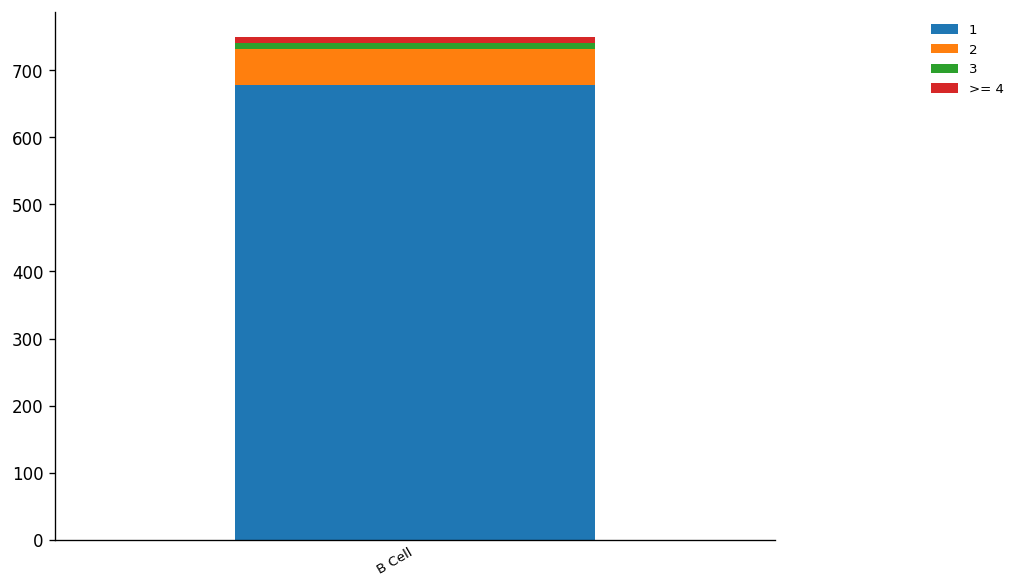

In [88]:
ir.pl.clonal_expansion(adata, groupby="new.ident", clip_at=4, normalize=False,figsize=(10,8))


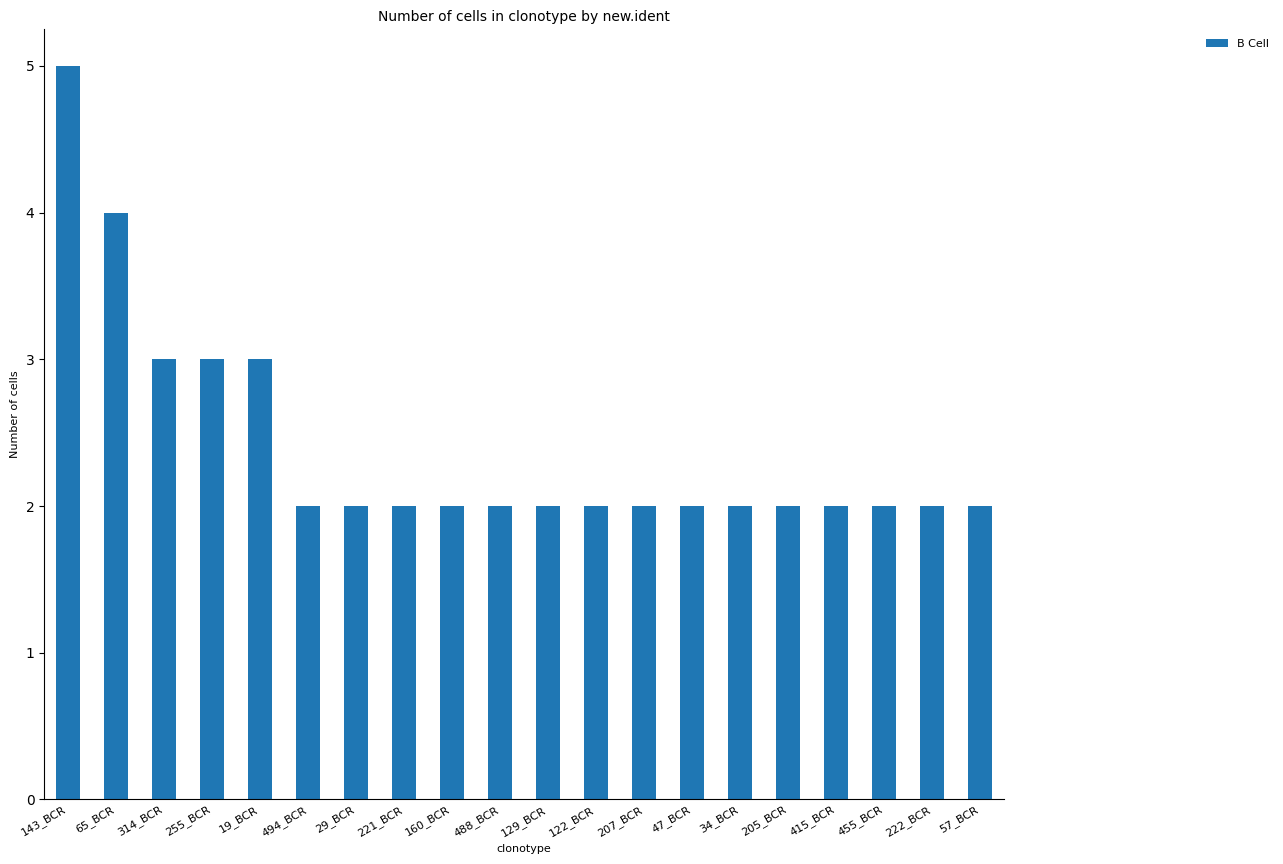

In [99]:
ir.pl.group_abundance(adata, groupby="clonotype", target_col="new.ident", max_cols=20,fig_kws={"dpi": 100})

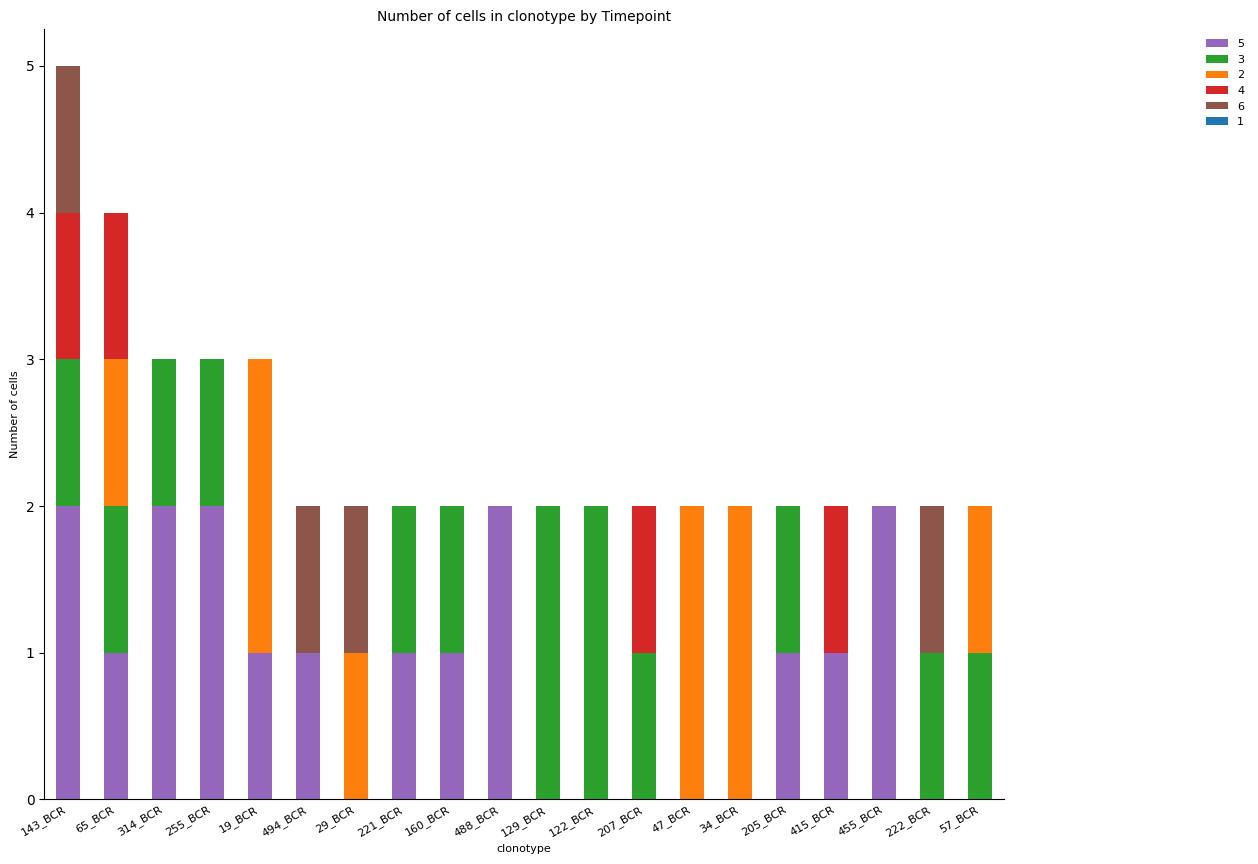

In [90]:
ir.pl.group_abundance(adata, groupby="clonotype", target_col="Timepoint", max_cols=20,fig_kws={"dpi": 100})

In [91]:
adata.obs.to_csv("/home/matthew/Research/HL_PD1/bcell_subsets/bcr_analyzed.csv")

In [100]:
# plot for each timepoint
t1 = adata[adata.obs['Timepoint'].isin(['1'])]
t2 = adata[adata.obs['Timepoint'].isin(['2'])]
t3 = adata[adata.obs['Timepoint'].isin(['3'])]
t4 = adata[adata.obs['Timepoint'].isin(['4'])]
t5 = adata[adata.obs['Timepoint'].isin(['5'])]
t6 = adata[adata.obs['Timepoint'].isin(['6'])]


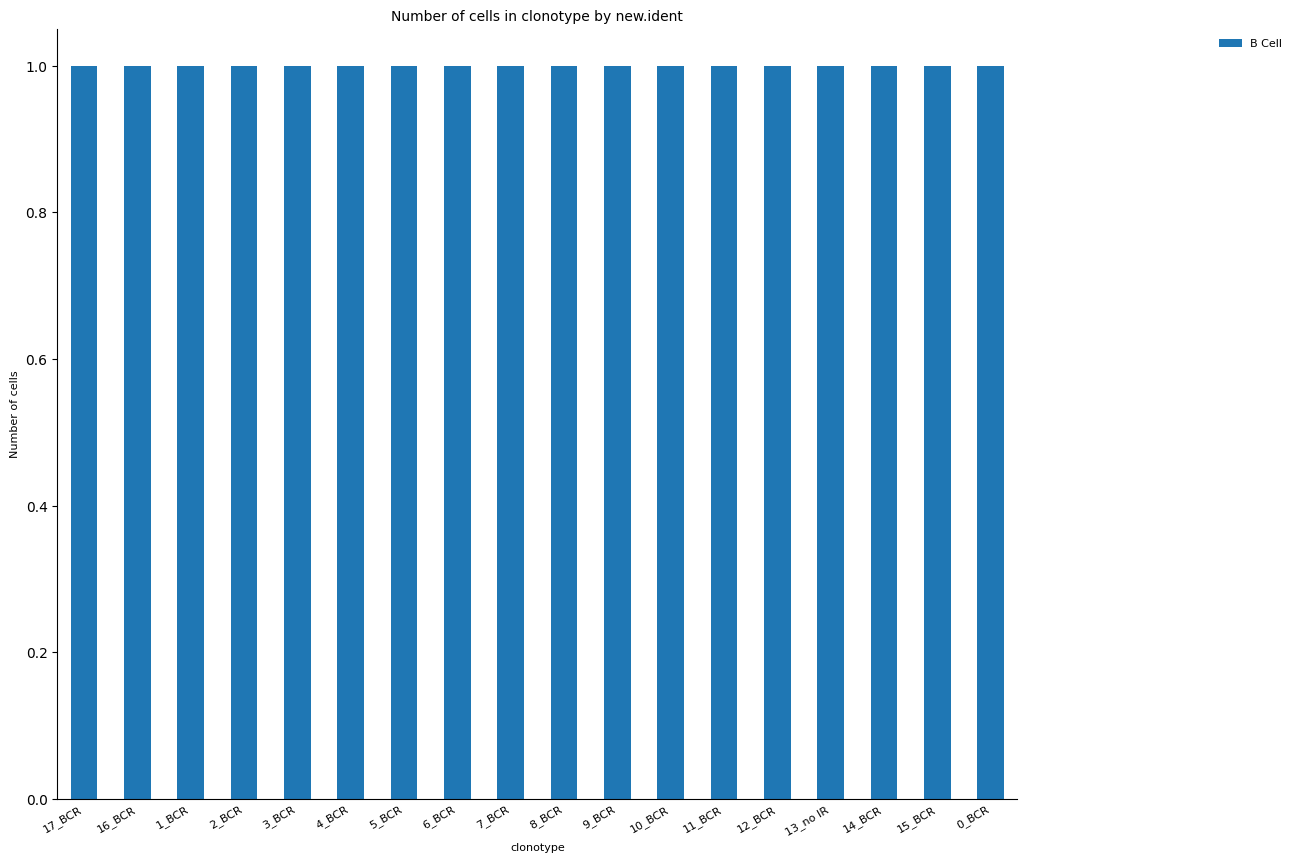

In [101]:
ir.pl.group_abundance(t1, groupby="clonotype", target_col="new.ident", max_cols=20,fig_kws={"dpi": 100})

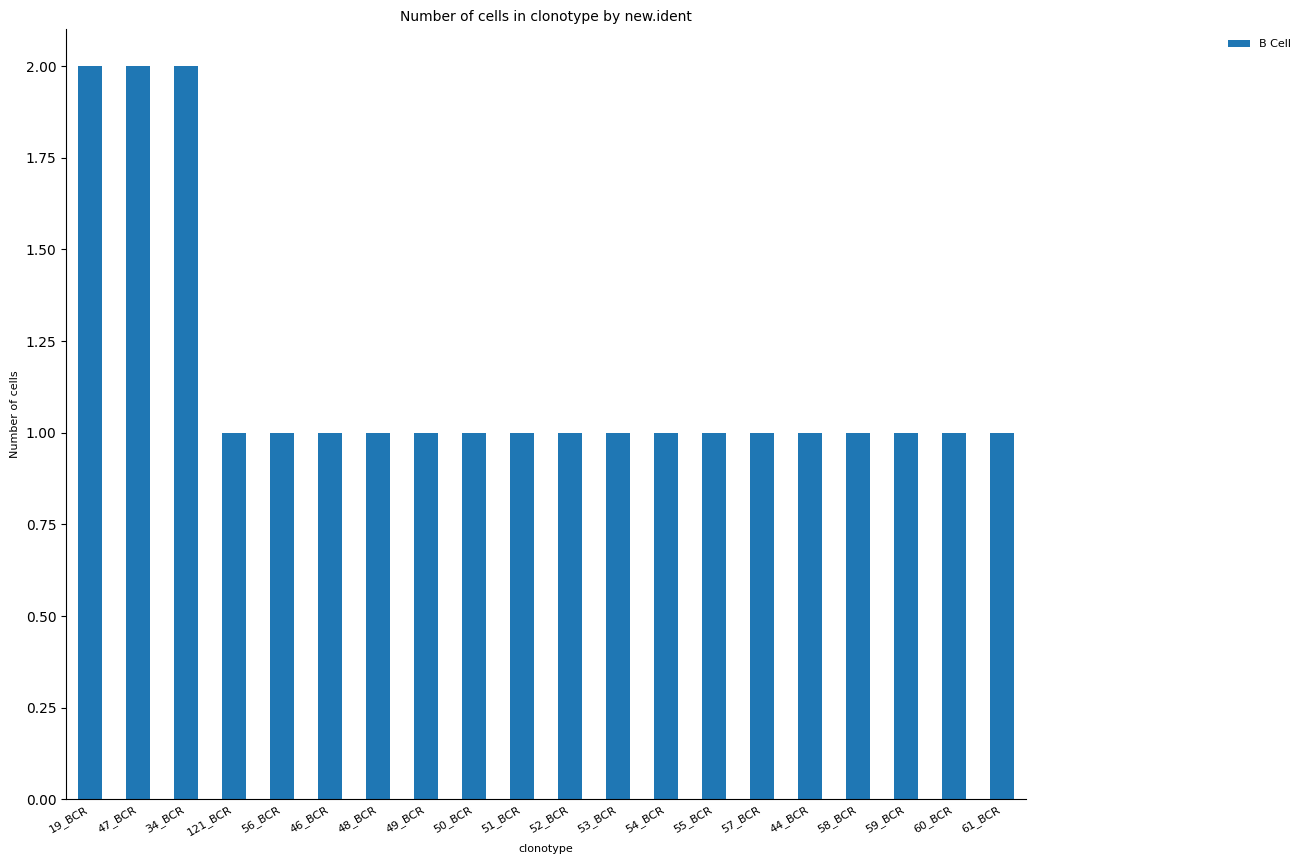

In [102]:
ir.pl.group_abundance(t2, groupby="clonotype", target_col="new.ident", max_cols=20,fig_kws={"dpi": 100})

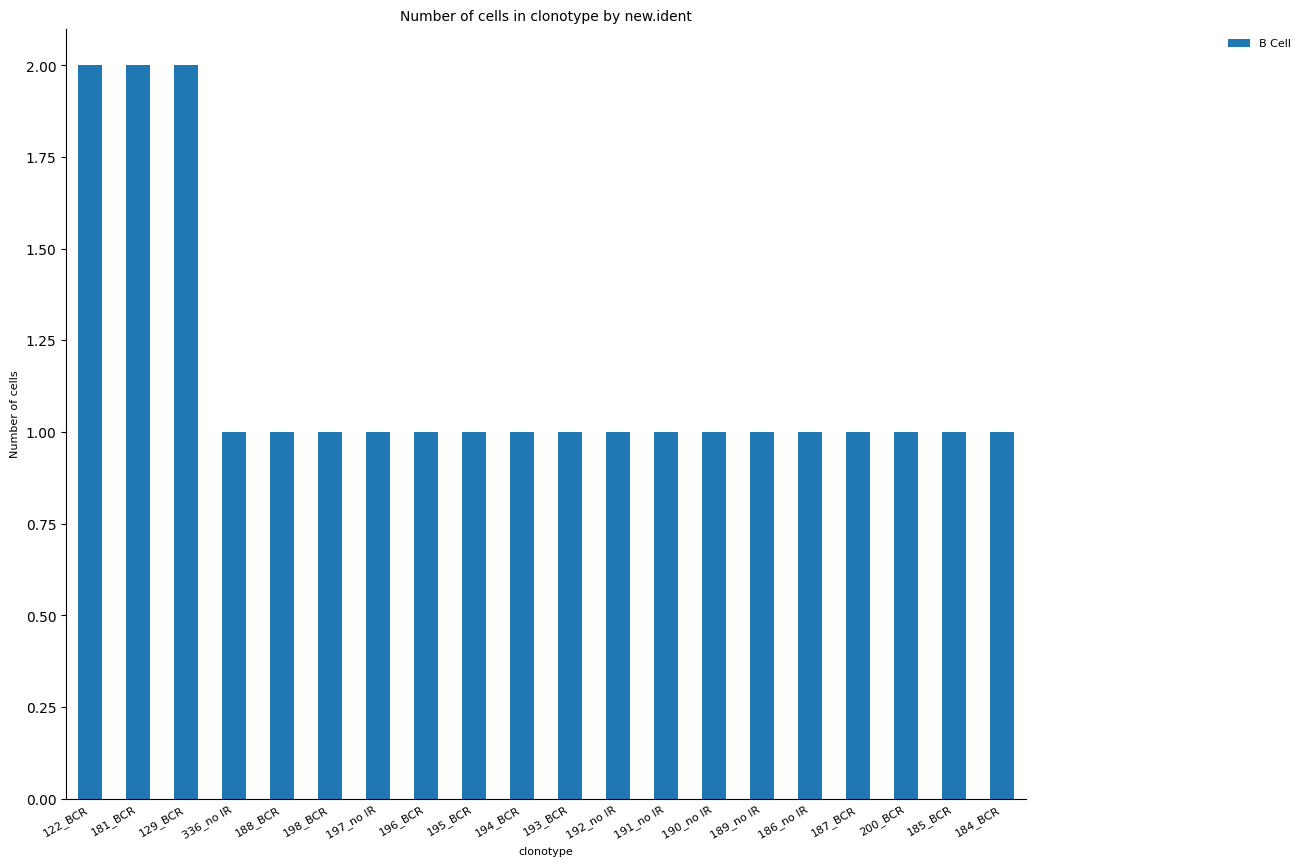

In [103]:
ir.pl.group_abundance(t3, groupby="clonotype", target_col="new.ident", max_cols=20,fig_kws={"dpi": 100})

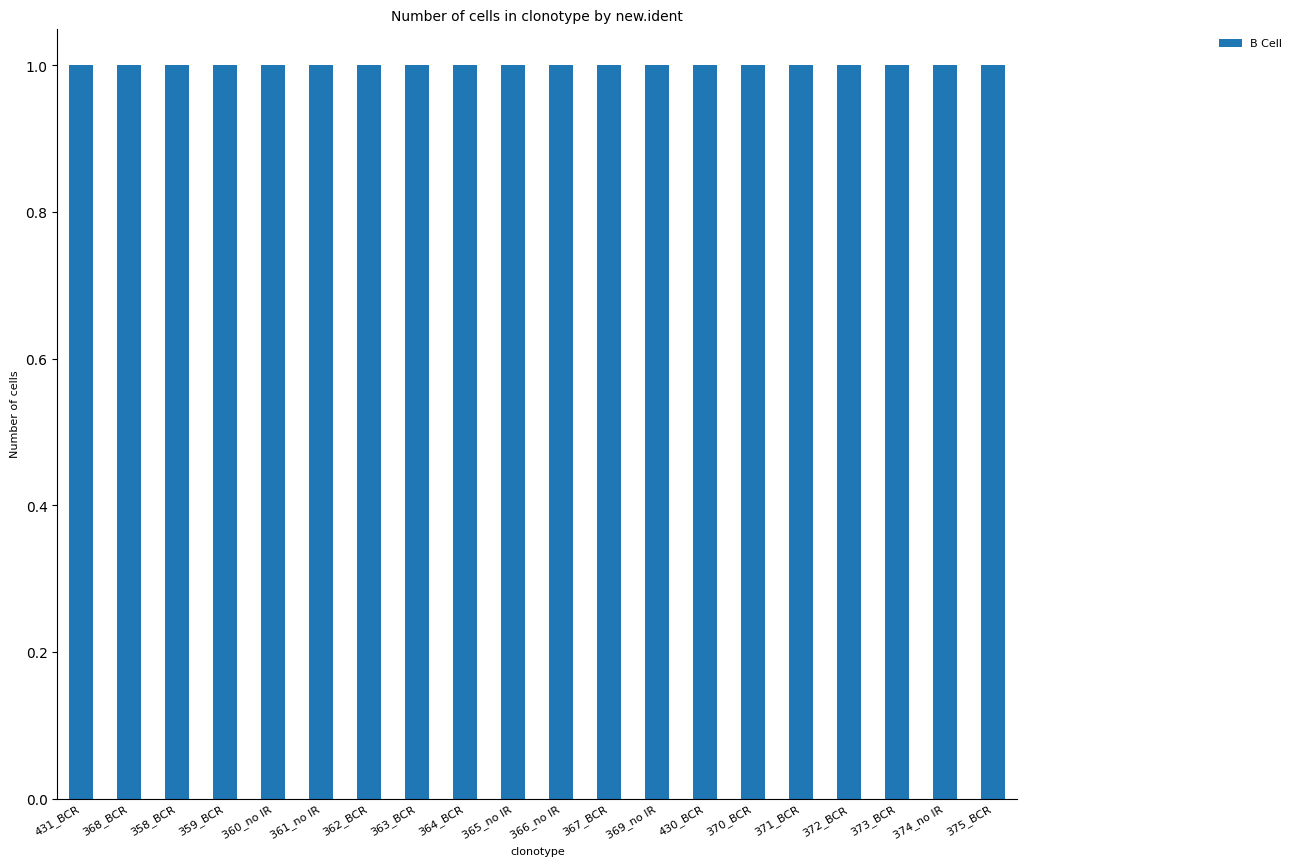

In [104]:
ir.pl.group_abundance(t4, groupby="clonotype", target_col="new.ident", max_cols=20,fig_kws={"dpi": 100})

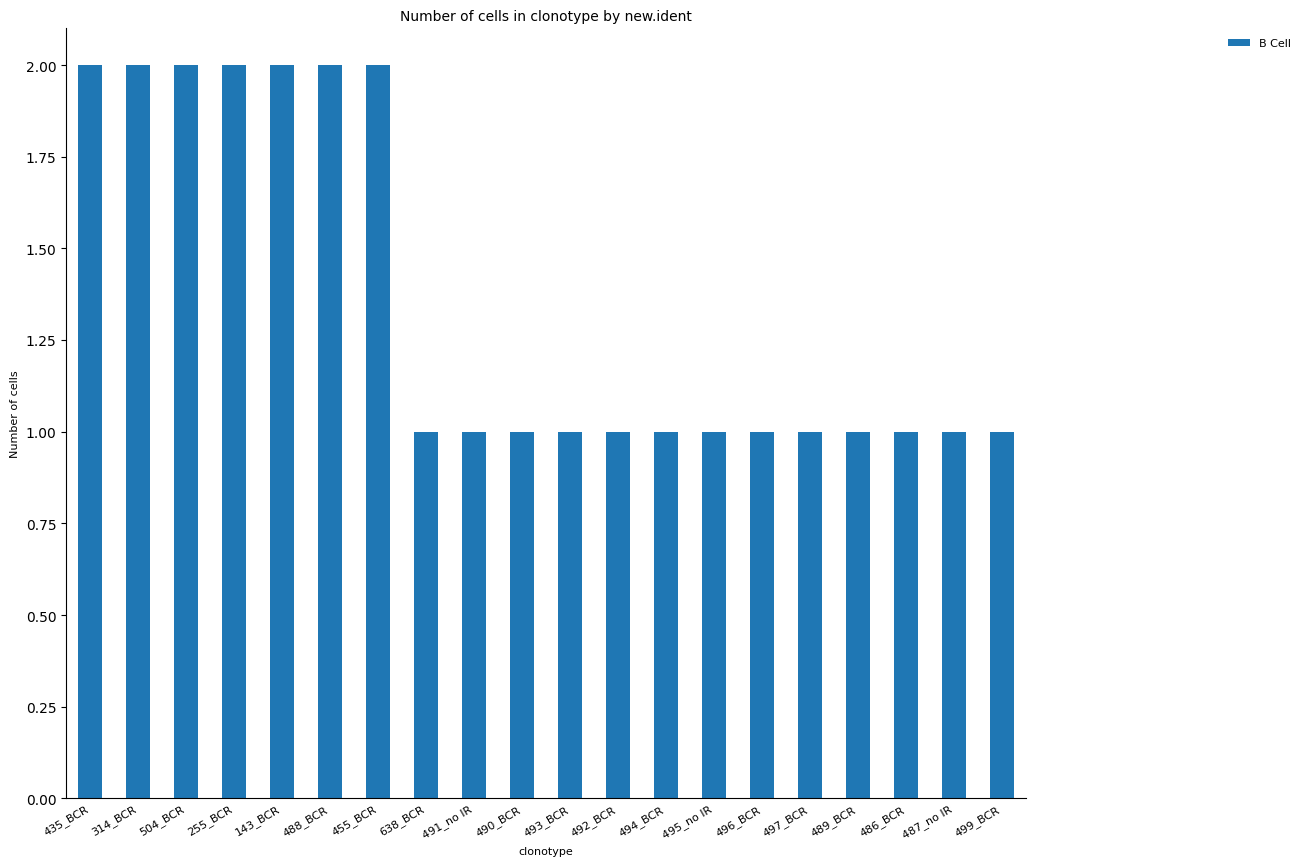

In [79]:
ir.pl.group_abundance(t5, groupby="clonotype", target_col="new.ident", max_cols=20,fig_kws={"dpi": 100})

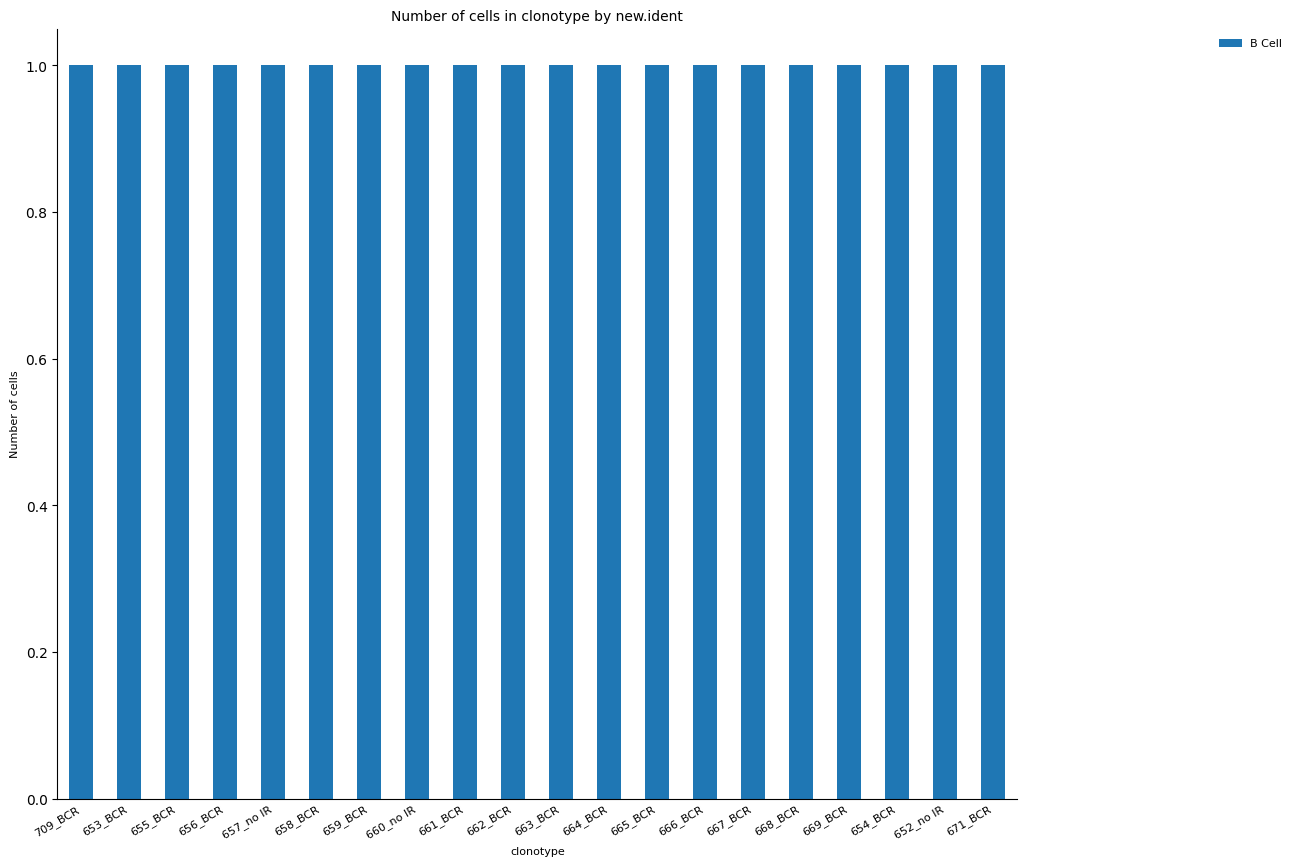

In [96]:
ir.pl.group_abundance(t6, groupby="clonotype", target_col="new.ident", max_cols=20,fig_kws={"dpi": 100})

In [95]:
adata.write("bcr.h5ad")

In [86]:
adata.obs.to_csv("/home/matthew/Research/HL_PD1/bcell_subsets/bcr_analyzed.csv")